<a href="https://colab.research.google.com/github/aimerou/notebooks/blob/main/computer_vision/image_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir known

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O known/elon_musk.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/0/01/Bill_Gates_July_2014.jpg -O known/bill_gates.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/3/30/Angela_merkel_1.jpg -O known/angela_merkel.jpg

In [55]:
!mkdir test

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/d/db/Merkel_et_gates.jpg -O test/1.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/6/69/Elon_et_sa_femme.jpg  -O test/2.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/6/64/Merkel_and_husband.jpg -O test/3.jpg

In [ ]:
!pip install face_recognition

In [58]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [59]:
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width,height))

In [60]:
known_dir = 'known'
test_dir = 'test'

In [61]:
known_encodings = [] 
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc)

In [62]:
known_names = [
  'Angela Merkel',
  'Bill Gates',
  'Elon Musk'
]

In [63]:
import matplotlib.pyplot as plt
import numpy as np

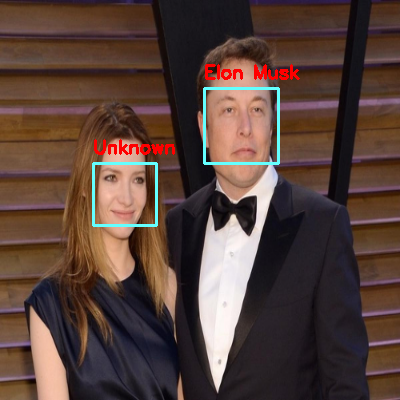

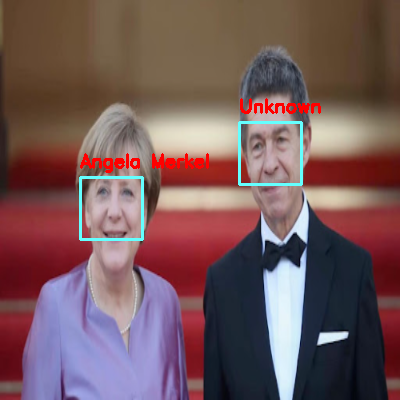

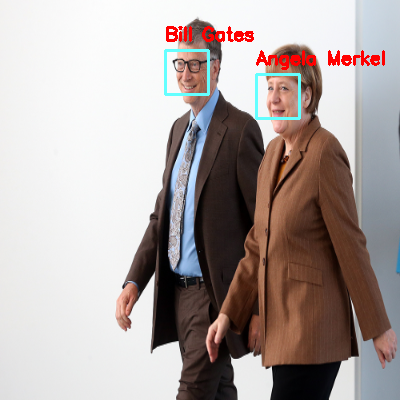

In [72]:
images = []

for file in os.listdir(test_dir):
 img = read_img(test_dir + '/' + file)
 img = cv2.resize(img, (400,400))
 img_encodings = []
 for enc in face_recognition.face_encodings(img):
   img_encodings.append(enc)
 names = []
 for img_enc in img_encodings:
   results = face_recognition.compare_faces(known_encodings,img_enc)
   res = [i for i, val in enumerate(results) if val]
   if not res:
     names.append("Unknown")
   else:
     names.append(known_names[res[0]])
 for i in range(len(face_recognition.face_locations(img))):
   # Drawing a rectangle box around the faces of test images
   (top,right,bottom,left) = face_recognition.face_locations(img)[0]
   y = top - 10 if top - 10 > 10 else top + 10
   cv2.rectangle(img,(left,top),(right,bottom),(255,255,100),2)
   # Drawing Rectangle
   cv2.putText(img, names[i], (left,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
 images.append(img)

for im in images:
  cv2_imshow(im)

In [ ]:
''' from google.colab import files
cv2.imwrite('elon_face_recognition.jpg', images[0])
files.download('elon_face_recognition.jpg') '''